<a href="https://colab.research.google.com/github/parkjunghyeon99/ossp/blob/main/Hello_Magenta_ipynb%EC%9D%98_%EC%82%AC%EB%B3%B8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

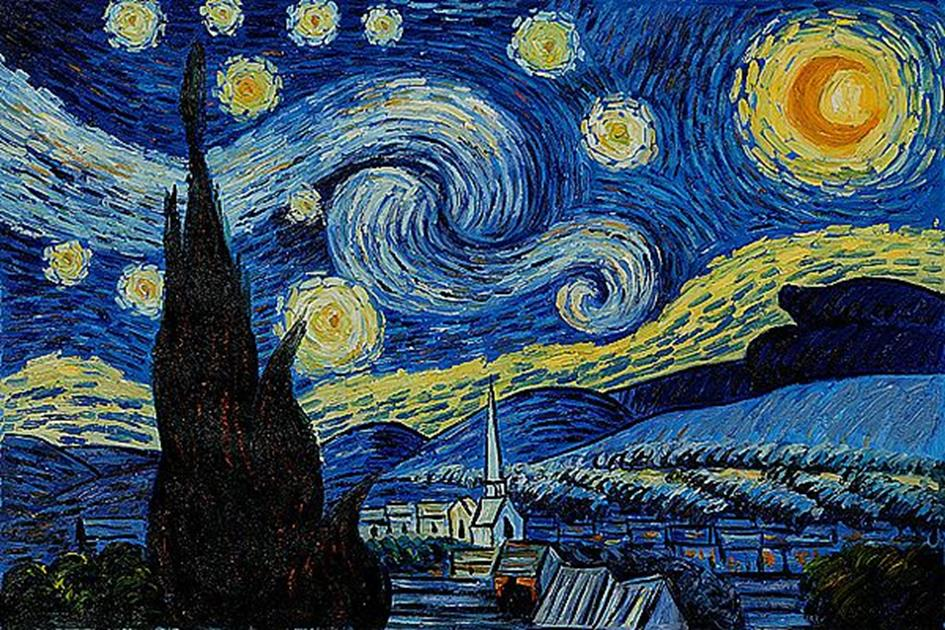

(630, 945, 3)


NameError: ignored

In [ ]:
import cv2
from google.colab.patches import cv2_imshow
import numpy as np

src = cv2.imread('/content/sample_data/sample2.jpg')
cv2_imshow(src)
print(src.shape)

test_resize = cv2.resize(sample2, dsize(500,500))
print(test_resize.shape)

#hsv = cv2.cvtColor(src, cv2.COLOR_BGR2HSV)
#h, s, v = cv2.split(hsv)

hsv2 = cv2.cvtColor(test_resize, cv2.COLOR_BGR2HSV)
h,s,v = cv2.split(hsv2)

print(hsv2.shape)
print(h,s,v)

# Making music with Magenta

[Magenta](https://magenta.tensorflow.org/) is a Python library that helps you generate art and music. In this tutorial, we'll talk about the music generation bits in `note_seq` -- how to make your browser sing, and in particular, how to make your browser sing like you!

As a library, `note_seq` can help you:
- make music using some of the neat abstractions and utilities in the library
- use Machine Learning models to generate music.

# Basic Instructions

1. Double click on the hidden cells to make them visible, or select "View > Expand Sections" in the menu at the top.
2. Hover over the "`[ ]`" in the top-left corner of each cell and click on the "Play" button to run it, in order.
3. Listen to the generated samples.
4. Make it your own: copy the notebook, modify the code, train your own models, upload your own MIDI, etc. See the Magenta code on [GitHub](https://github.com/magenta/magenta) for more information!

# Step 0: First things first!
If you're going to use `Magenta`, you need to install it and its dependencies. Some of the later examples will also download other dependencies (such as models and checkpoints)

In [ ]:
# test {"output": "ignore"}
print('Installing dependencies...')
!apt-get update -qq && apt-get install -qq libfluidsynth1 fluid-soundfont-gm build-essential libasound2-dev libjack-dev
!pip install -qU pyfluidsynth pretty_midi

!pip install -qU magenta

# Hack to allow python to pick up the newly-installed fluidsynth lib. 
# This is only needed for the hosted Colab environment.
import ctypes.util
orig_ctypes_util_find_library = ctypes.util.find_library
def proxy_find_library(lib):
  if lib == 'fluidsynth':
    return 'libfluidsynth.so.1'
  else:
    return orig_ctypes_util_find_library(lib)
ctypes.util.find_library = proxy_find_library

print('Importing libraries and defining some helper functions...')
from google.colab import files

import magenta
import note_seq
import tensorflow

print('🎉 Done!')
print(magenta.__version__)
print(tensorflow.__version__)

Installing dependencies...
Selecting previously unselected package fluid-soundfont-gm.
(Reading database ... 155229 files and directories currently installed.)
Preparing to unpack .../fluid-soundfont-gm_3.1-5.1_all.deb ...
Unpacking fluid-soundfont-gm (3.1-5.1) ...
Selecting previously unselected package libfluidsynth1:amd64.
Preparing to unpack .../libfluidsynth1_1.1.9-1_amd64.deb ...
Unpacking libfluidsynth1:amd64 (1.1.9-1) ...
Setting up fluid-soundfont-gm (3.1-5.1) ...
Setting up libfluidsynth1:amd64 (1.1.9-1) ...
Processing triggers for libc-bin (2.27-3ubuntu1.3) ...
/sbin/ldconfig.real: /usr/local/lib/python3.7/dist-packages/ideep4py/lib/libmkldnn.so.0 is not a symbolic link

     |████████████████████████████████| 5.6 MB 33.3 MB/s 
     |████████████████████████████████| 51 kB 5.3 MB/s 
     |████████████████████████████████| 1.4 MB 26.4 MB/s 
     |████████████████████████████████| 1.6 MB 44.4 MB/s 
     |████████████████████████████████| 87 kB 5.8 MB/s 
     |█████████████████

/usr/local/lib/python3.7/dist-packages/librosa/util/decorators.py:9: NumbaDeprecationWarning: An import was requested from a module that has moved location.
Import requested from: 'numba.decorators', please update to use 'numba.core.decorators' or pin to Numba version 0.48.0. This alias will not be present in Numba version 0.50.0.
  from numba.decorators import jit as optional_jit
/usr/local/lib/python3.7/dist-packages/librosa/util/decorators.py:9: NumbaDeprecationWarning: An import was requested from a module that has moved location.
Import of 'jit' requested from: 'numba.decorators', please update to use 'numba.core.decorators' or pin to Numba version 0.48.0. This alias will not be present in Numba version 0.50.0.
  from numba.decorators import jit as optional_jit


🎉 Done!
2.1.3
2.7.0


# Step 1. Making sounds with NoteSequences

Everything in `Magenta` is centered around [NoteSequences](https://github.com/magenta/note-seq/blob/main/note_seq/protobuf/music.proto#L27). This is an abstract representation of a series of notes, each with different pitches, instruments and strike velocities, much like [MIDI](https://en.wikipedia.org/wiki/MIDI).

For example, this is a `NoteSequence` that represents "Twinkle Twinkle Little Star". Try changing the pitches to see how the sound changes!

In [ ]:
from note_seq.protobuf import music_pb2

twinkle_twinkle = music_pb2.NoteSequence()

# Add the notes to the sequence.
twinkle_twinkle.notes.add(pitch=60, start_time=0.0, end_time=0.5, velocity=80)
twinkle_twinkle.notes.add(pitch=60, start_time=0.5, end_time=1.0, velocity=80)
twinkle_twinkle.notes.add(pitch=67, start_time=1.0, end_time=1.5, velocity=80)
twinkle_twinkle.notes.add(pitch=67, start_time=1.5, end_time=2.0, velocity=80)
twinkle_twinkle.notes.add(pitch=69, start_time=2.0, end_time=2.5, velocity=80)
twinkle_twinkle.notes.add(pitch=69, start_time=2.5, end_time=3.0, velocity=80)
twinkle_twinkle.notes.add(pitch=67, start_time=3.0, end_time=4.0, velocity=80)
twinkle_twinkle.notes.add(pitch=65, start_time=4.0, end_time=4.5, velocity=80)
twinkle_twinkle.notes.add(pitch=65, start_time=4.5, end_time=5.0, velocity=80)
twinkle_twinkle.notes.add(pitch=64, start_time=5.0, end_time=5.5, velocity=80)
twinkle_twinkle.notes.add(pitch=64, start_time=5.5, end_time=6.0, velocity=80)
twinkle_twinkle.notes.add(pitch=62, start_time=6.0, end_time=6.5, velocity=80)
twinkle_twinkle.notes.add(pitch=62, start_time=6.5, end_time=7.0, velocity=80)
twinkle_twinkle.notes.add(pitch=60, start_time=7.0, end_time=8.0, velocity=80) 
twinkle_twinkle.total_time = 8

twinkle_twinkle.tempos.add(qpm=60);

# This is a colab utility method that visualizes a NoteSequence.
note_seq.plot_sequence(twinkle_twinkle)

# This is a colab utility method that plays a NoteSequence.
note_seq.play_sequence(twinkle_twinkle,synth=note_seq.fluidsynth)

# Here's another NoteSequence!
teapot = music_pb2.NoteSequence()
teapot.notes.add(pitch=69, start_time=0, end_time=0.5, velocity=80)
teapot.notes.add(pitch=71, start_time=0.5, end_time=1, velocity=80)
teapot.notes.add(pitch=73, start_time=1, end_time=1.5, velocity=80)
teapot.notes.add(pitch=74, start_time=1.5, end_time=2, velocity=80)
teapot.notes.add(pitch=76, start_time=2, end_time=2.5, velocity=80)
teapot.notes.add(pitch=81, start_time=3, end_time=4, velocity=80)
teapot.notes.add(pitch=78, start_time=4, end_time=5, velocity=80)
teapot.notes.add(pitch=81, start_time=5, end_time=6, velocity=80)
teapot.notes.add(pitch=76, start_time=6, end_time=8, velocity=80)
teapot.total_time = 8

teapot.tempos.add(qpm=60);

note_seq.plot_sequence(teapot)
note_seq.play_sequence(teapot,synth=note_seq.synthesize)

You can use other instruments for your sequences. For example, the sequence below should sound like a drum solo!

In [ ]:
drums = music_pb2.NoteSequence()

abc = 8

drums.notes.add(pitch=40, start_time=0, end_time=0.4, numerator=1, denominator=4,program=abc, instrument=65, velocity=127)
drums.notes.add(pitch=50, start_time=0.6, end_time=1.0, numerator=1, denominator=4,program=abc, instrument=65, velocity=0)
#drums.notes.add(pitch=38, start_time=0, end_time=0.125, numerator=1, denominator=4, program=7,  instrument=65, velocity=80)
#drums.notes.add(pitch=42, start_time=0, end_time=0.125, numerator=1, denominator=4, program=7, instrument=65, velocity=80)
#drums.notes.add(pitch=46, start_time=0, end_time=0.125,  numerator=1, denominator=4, program=7,  instrument=65, velocity=80)
#drums.notes.add(pitch=42, start_time=0.25, end_time=0.375,  numerator=1, denominator=4, program=7, instrument=65, velocity=80)
#drums.notes.add(pitch=42, start_time=0.375, end_time=0.5,  numerator=1, denominator=4, program=7,  instrument=65, velocity=80)
#drums.notes.add(pitch=42, start_time=0.5, end_time=0.625, numerator=1, denominator=4, program=7, is_drum=True, instrument=65, velocity=80)
#drums.notes.add(pitch=50, start_time=0.5, end_time=0.625, is_drum=True, instrument=65, velocity=80)
#drums.notes.add(pitch=36, start_time=0.75, end_time=0.875, is_drum=True, instrument=65, velocity=80)
#drums.notes.add(pitch=38, start_time=0.75, end_time=0.875, is_drum=True, instrument=65, velocity=80)
#drums.notes.add(pitch=42, start_time=0.75, end_time=0.875, is_drum=True, instrument=10, velocity=80)
#drums.notes.add(pitch=45, start_time=0.75, end_time=0.875, is_drum=True, instrument=10, velocity=80)
drums.notes.add(pitch=36, start_time=1, end_time=1.125, is_drum=True, instrument=10, velocity=80)
drums.notes.add(pitch=42, start_time=1, end_time=1.125, is_drum=True, instrument=10, velocity=80)
drums.notes.add(pitch=46, start_time=1, end_time=1.125, is_drum=True, instrument=10, velocity=80)
drums.notes.add(pitch=42, start_time=1.25, end_time=1.375, is_drum=True, instrument=10, velocity=80)
drums.notes.add(pitch=48, start_time=1.25, end_time=1.375, is_drum=True, instrument=10, velocity=80)
drums.notes.add(pitch=50, start_time=1.25, end_time=1.375, is_drum=True, instrument=10, velocity=80)
drums.total_time = 1.75

drums.tempos.add(qpm=60)

# This is a colab utility method that visualizes a NoteSequence.
note_seq.plot_sequence(drums)

# This is a colab utility method that plays a NoteSequence.
note_seq.play_sequence(drums,synth=note_seq.fluidsynth)

## Converting a `NoteSequence` to MIDI

When you called the "play_sequence" method above, this converted the `NoteSequence` to MIDI, and created an HTML widget to play it. This method is specially made for colab notebooks, so it won't work inside your Python script. That method uses the Magenta built-in [conversion methods](https://github.com/magenta/note-seq/blob/main/note_seq/midi_io.py#L51), which you can use in your python script:

In [ ]:
# This creates a file called `drums_sample_output.mid`, containing the drums solo we've been using.
note_seq.sequence_proto_to_midi_file(drums, 'drums_sample_output.mid')

# This is a colab utility method to download that file. In your Python script, you 
# would just write it to disk.
files.download('drums_sample_output.mid')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

## Useful helpers
There are a lot of other helper methods sprinkled around the `note_seq` codebase that you might need but not know where to find. Here are some of our favourites:

- [converting](https://github.com/magenta/note-seq/blob/main/note_seq/midi_io.py) between MIDI and NoteSequences
- [trimming, concatenating and expanding](https://github.com/magenta/note-seq/blob/main/note_seq/sequences_lib.py) NoteSequences
- [colab notebook](https://github.com/magenta/note-seq/blob/main/note_seq/notebook_utils.py) utils

# Step 2. Using Machine Learning to make music

`note_seq` has several Machine Learning models, each with different strengths. All models are built with [Tensorflow](https://www.tensorflow.org), so they will run faster if you can run them on a GPU. Here are some of the most popular ones:

- [**MelodyRNN**](https://github.com/magenta/magenta/tree/main/magenta/models/melody_rnn) - you give it a NoteSequence, and it continues it in the style of your original NoteSequence.
- [**MusicVAE**](https://github.com/magenta/magenta/tree/main/magenta/models/music_vae) - generates brand new NoteSequences or interpolates between two sequences.
- [**Onsets and Frames**](https://github.com/magenta/magenta/tree/main/magenta/models/onsets_frames_transcription) -- transcribes piano audio

Now that we know how to use `NoteSequences`, adding some basic Machine Learning is a continuation of that. The pattern for using any of these models is:

- Load `note_seq` (which we already know how to do!)
- Create a model from a downloaded checkpoint (i.e. where the weights, or the encoding, of the model lives)
- Ask the model to do something.

## Melody RNN

A MelodyRNN is an [LSTM-based](https://colah.github.io/posts/2015-08-Understanding-LSTMs/) language model for musical notes -- it is best at continuing a NoteSequence that you give it.

To use it, you need to give it a sequence to continue and the model will return the following sequence.

This example shows how to use the basic Melody RNN model -- check out the [docs](https://github.com/magenta/magenta/tree/main/magenta/models/melody_rnn) for the other models, such as `lookback_rnn` and `attention_rnn`.

### Initialize the model

In [ ]:
print('Downloading model bundle. This will take less than a minute...')
note_seq.notebook_utils.download_bundle('basic_rnn.mag', '/content/')

# Import dependencies.
from magenta.models.melody_rnn import melody_rnn_sequence_generator
from magenta.models.shared import sequence_generator_bundle
from note_seq.protobuf import generator_pb2
from note_seq.protobuf import music_pb2

# Initialize the model.
print("Initializing Melody RNN...")
bundle = sequence_generator_bundle.read_bundle_file('/content/basic_rnn.mag')
generator_map = melody_rnn_sequence_generator.get_generator_map()
melody_rnn = generator_map['basic_rnn'](checkpoint=None, bundle=bundle)
melody_rnn.initialize()

print('🎉 Done!')

Initializing Melody RNN...
'model_variables' collection should be of type 'byte_list', but instead is of type 'node_list'.
INFO:tensorflow:Restoring parameters from /tmp/tmpru2upxs2/model.ckpt
🎉 Done!


### Continuing a sequence

With Melody RNN, you can configure the number of steps the new sequence will be, as well as the "temperature" of the result -- the higher the temperature, the more random (and less like the input) your sequence will be. You can play around with these values and see how the resulting sequences are different:

In [ ]:
# Model options. Change these to get different generated sequences! 

input_sequence = twinkle_twinkle # change this to teapot if you want
num_steps = 128 # change this for shorter or longer sequences
temperature = 1.0 # the higher the temperature the more random the sequence.

# Set the start time to begin on the next step after the last note ends.
last_end_time = (max(n.end_time for n in input_sequence.notes)
                  if input_sequence.notes else 0)
qpm = input_sequence.tempos[0].qpm 
seconds_per_step = 60.0 / qpm / melody_rnn.steps_per_quarter
total_seconds = num_steps * seconds_per_step

generator_options = generator_pb2.GeneratorOptions()
generator_options.args['temperature'].float_value = temperature
generate_section = generator_options.generate_sections.add(
  start_time=last_end_time + seconds_per_step,
  end_time=total_seconds)

# Ask the model to continue the sequence.
sequence = melody_rnn.generate(input_sequence, generator_options)

note_seq.plot_sequence(sequence)
note_seq.play_sequence(sequence, synth=note_seq.fluidsynth)


INFO:tensorflow:Beam search yields sequence with log-likelihood: -99.410980 


## Music VAE

A [MusicVAE](https://g.co/magenta/musicvae) is a variational autoencoder made up of an Encoder and Decoder -- you can think of the encoder as trying to summarize all the data you give it, and the decoder as trying to recreate the original data, based on this summarized version. As a generative model, you can think of a VAE as coming up with new sequences that could be a decoding of some summarized version.

The Music VAE implementation in `magenta/music` in particular does two things: it can create new sequences (which are reconstructions or variations of the input data), or it can interpolate between two.

### Initialize the model

In [ ]:
print('Copying checkpoint from GCS. This will take less than a minute...')
# This will download the mel_2bar_big checkpoint. There are more checkpoints that you
# can use with this model, depending on what kind of output you want
# See the list of checkpoints: https://github.com/magenta/magenta/tree/main/magenta/models/music_vae#pre-trained-checkpoints
!gsutil -q -m cp -R gs://download.magenta.tensorflow.org/models/music_vae/colab2/checkpoints/mel_2bar_big.ckpt.* /content/

# Import dependencies.
from magenta.models.music_vae import configs
from magenta.models.music_vae.trained_model import TrainedModel

# Initialize the model.
print("Initializing Music VAE...")
music_vae = TrainedModel(
      configs.CONFIG_MAP['cat-mel_2bar_big'], 
      batch_size=4, 
      checkpoint_dir_or_path='/content/mel_2bar_big.ckpt')

print('🎉 Done!')


Copying checkpoint from GCS. This will take less than a minute...
Initializing Music VAE...
INFO:tensorflow:Building MusicVAE model with BidirectionalLstmEncoder, CategoricalLstmDecoder, and hparams:
{'max_seq_len': 32, 'z_size': 512, 'free_bits': 0, 'max_beta': 0.5, 'beta_rate': 0.99999, 'batch_size': 4, 'grad_clip': 1.0, 'clip_mode': 'global_norm', 'grad_norm_clip_to_zero': 10000, 'learning_rate': 0.001, 'decay_rate': 0.9999, 'min_learning_rate': 1e-05, 'conditional': True, 'dec_rnn_size': [2048, 2048, 2048], 'enc_rnn_size': [2048], 'dropout_keep_prob': 1.0, 'sampling_schedule': 'inverse_sigmoid', 'sampling_rate': 1000, 'use_cudnn': False, 'residual_encoder': False, 'residual_decoder': False, 'control_preprocessing_rnn_size': [256]}
INFO:tensorflow:
Encoder Cells (bidirectional):
  units: [2048]

INFO:tensorflow:
Decoder Cells:
  units: [2048, 2048, 2048]

Instructions for updating:
Use `tf.cast` instead.


/usr/local/lib/python3.7/dist-packages/magenta/models/music_vae/lstm_utils.py:99: UserWarning: `tf.layers.dense` is deprecated and will be removed in a future version. Please use `tf.keras.layers.Dense` instead.
  name=name),
/usr/local/lib/python3.7/dist-packages/keras/legacy_tf_layers/core.py:255: UserWarning: `layer.apply` is deprecated and will be removed in a future version. Please use `layer.__call__` method instead.
  return layer.apply(inputs)
/usr/local/lib/python3.7/dist-packages/magenta/contrib/rnn.py:751: UserWarning: `layer.add_variable` is deprecated and will be removed in a future version. Please use `layer.add_weight` method instead.
  self._names["W"], [input_size + self._num_units, self._num_units * 4])
/usr/local/lib/python3.7/dist-packages/magenta/contrib/rnn.py:754: UserWarning: `layer.add_variable` is deprecated and will be removed in a future version. Please use `layer.add_weight` method instead.
  initializer=tf.constant_initializer(0.0))


Instructions for updating:
Please use `keras.layers.Bidirectional(keras.layers.RNN(cell))`, which is equivalent to this API
Instructions for updating:
Please use `keras.layers.RNN(cell)`, which is equivalent to this API
Instructions for updating:
Do not call `graph_parents`.
INFO:tensorflow:Restoring parameters from /content/mel_2bar_big.ckpt


/usr/local/lib/python3.7/dist-packages/magenta/models/music_vae/base_model.py:199: UserWarning: `tf.layers.dense` is deprecated and will be removed in a future version. Please use `tf.keras.layers.Dense` instead.
  kernel_initializer=tf.random_normal_initializer(stddev=0.001))
/usr/local/lib/python3.7/dist-packages/magenta/models/music_vae/base_model.py:205: UserWarning: `tf.layers.dense` is deprecated and will be removed in a future version. Please use `tf.keras.layers.Dense` instead.
  kernel_initializer=tf.random_normal_initializer(stddev=0.001))


🎉 Done!


### Creating new sequences

With Music VAE, you can configure how many new sequences to generate, the number of steps the new sequence will be, as well as the "temperature" of the result -- the higher the temperature, the more random (and less like the input) your sequence will be. You can play around with these values and see how the resulting sequences are different:

In [ ]:
generated_sequences = music_vae.sample(n=2, length=80, temperature=1.0)

for ns in generated_sequences:
  # print(ns)
  note_seq.plot_sequence(ns)
  note_seq.play_sequence(ns, synth=note_seq.fluidsynth)

### Interpolating between two sequences

In [ ]:
# We're going to interpolate between the Twinkle Twinkle Little Star
# NoteSequence we defined in the first section, and one of the generated
# sequences from the previous VAE example

# How many sequences, including the start and end ones, to generate.
num_steps = 8;

# This gives us a list of sequences.
note_sequences = music_vae.interpolate(
      twinkle_twinkle,
      teapot, 
      num_steps=num_steps,
      length=32)

# Concatenate them into one long sequence, with the start and 
# end sequences at each end. 
interp_seq = note_seq.sequences_lib.concatenate_sequences(note_sequences)

note_seq.play_sequence(interp_seq, synth=note_seq.fluidsynth)
note_seq.plot_sequence(interp_seq)

# That's it!

You're now ready to build your own amazing, Machine Learning powered, music instrument! If you want more information, you can check out:

- some [demos](https://magenta.tensorflow.org/demos) `#MadeWithMagenta`
- some more of our [Colab notebooks](https://magenta.tensorflow.org/demos#colab-notebooks)
- the [documentation](https://github.com/magenta/magenta)
- the [Magenta blog](https://magenta.tensorflow.org/blog), which talks about all the mathy bits we skipped.

Have fun! 💕